Major Downtime 23-24 October
============================


In [6]:
# Import and Init the main tools
# If for some reason you do not want to cache your data you can pass 
# 'cache_data=False' to the CachedDataLoader constructor.  

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [7]:
# Get hold of the dataframe 
sql = 'SELECT * FROM v__wcb__h__record_counts'
df = cdl.get_dataframe(sql)
df = cdl.reindex_by_timestamp(df, "ts", "1H")
# df.describe()


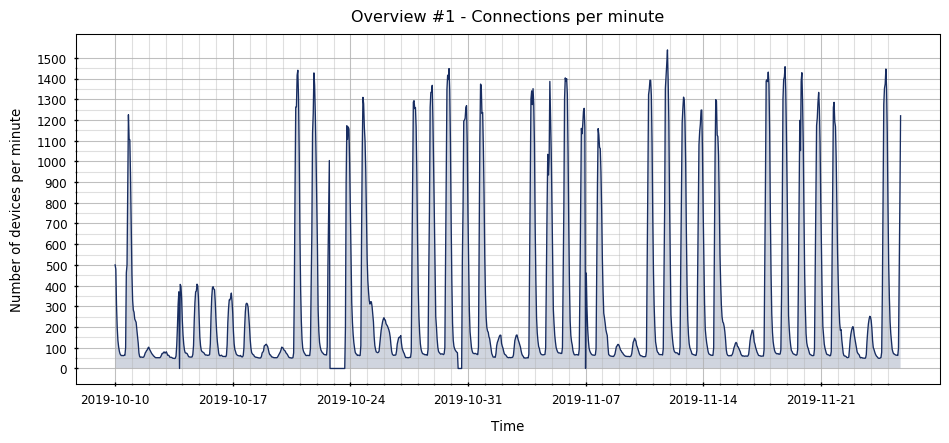

In [8]:
plotconfig = {
    "title": "Overview #1 - Connections per minute",
    "plots": [
        {
            "data": df,
            "title": "",
            "x_column": "ts",
            "y_column": ["per_minute_count"],
            "x_label": "Time",
            "y_label": "Number of devices per minute",
            "x_major_ticks_freq": 24*7,
            "x_minor_ticks_freq": 24,
            "y_major_ticks_freq": 100,
            "y_minor_ticks_freq": 50,
        }
    ],
    "style": {
        "palette_color": "blue",
        "x_axis_value_rotation": 0,
        "y_axis_value_rotation": 0,
        "x_axis_value_format": "%Y-%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)


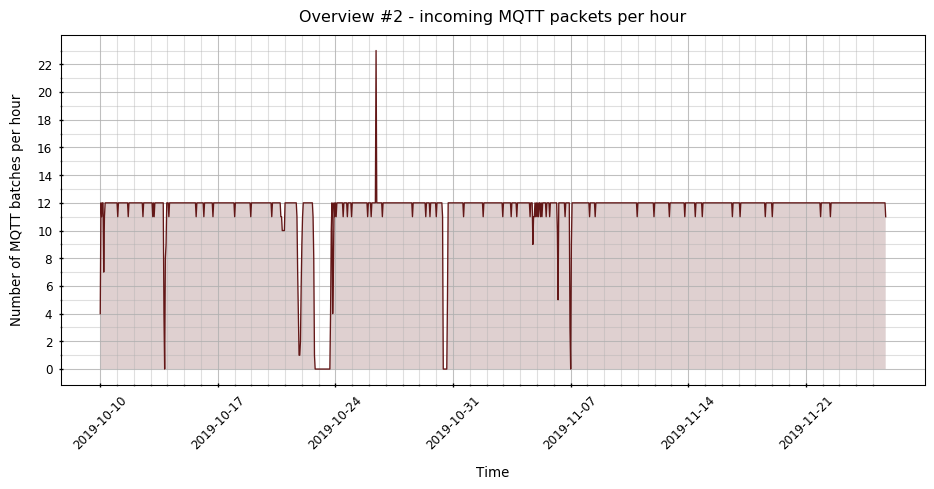

In [9]:
plotconfig = {
    "title": "Overview #2 - incoming MQTT packets per hour",
    "plots": [
        {
            "data": df,
            "title": "",
            "x_column": "ts",
            "y_column": ["mqtt_count"],
            "x_label": "Time",
            "y_label": "Number of MQTT batches per hour",
            "x_major_ticks_freq": 24*7,
            "x_minor_ticks_freq": 24,
            "y_major_ticks_freq": 2,
            "y_minor_ticks_freq": 1,
        }
    ],
    "style": {
        "palette_color": "red",
        "x_axis_value_rotation": 45,
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)

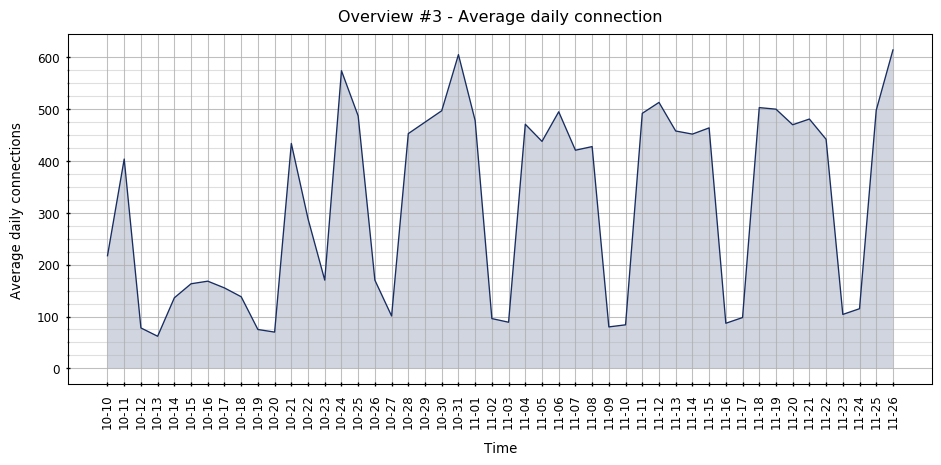

In [12]:
sql = 'SELECT * FROM v__wcb__d__record_counts'
df2 = cdl.get_dataframe(sql)
df2 = cdl.reindex_by_timestamp(df2, "ts", "1D")
plotconfig = {
    "title": "Overview #3 - Average daily connection",
    "plots": [
        {
            "data": df2,
            "title": "",
            "x_column": "ts",
            "y_column": ["per_minute_count"],
            "x_label": "Time",
            "y_label": "Average daily connections",
            "x_major_ticks_freq": 1,
            "x_minor_ticks_freq": 1,
            "y_major_ticks_freq": 100,
            "y_minor_ticks_freq": 25,
        }
    ],
    "style": {
        "palette_color": "blue",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 0,
        "x_axis_value_format": "%m-%d",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)
